In [106]:
pip install git+https://github.com/MIROptics/ECC2025.git

  Cloning https://github.com/MIROptics/ECC2025.git to /tmp/pip-req-build-hygx892g
  Running command git clone --filter=blob:none --quiet https://github.com/MIROptics/ECC2025.git /tmp/pip-req-build-hygx892g
  Resolved https://github.com/MIROptics/ECC2025.git to commit c4f6d31bc09682e16b5f5ab8af24c2e234f803d6
  Preparing metadata (setup.py) ... done


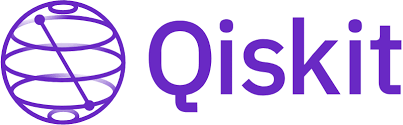

# Introducción a Qiskit
En este taller mostraremos los elementos básicos de Qiskit. Este es un modulo de python desarrollado por la empresa IBM para la manipulación de computadores cuánticos.

Podemos instalar Qiskit escribiendo en la terminal de anaconda "pip install qiskit"

Para comenzar importaremos la herramienta numpy de python.

In [2]:
import numpy as np

## Estados cuánticos

Recordemos que los estados cuánticos de un bit cuántico (qubit) son vectores de la forma

$$|\psi\rangle = \cos(\theta)|0\rangle + \sin(\theta) e^{i\phi}|1\rangle = \begin{bmatrix} \cos(\theta) \\ \sin(\theta) e^{i\phi} \end{bmatrix}, $$

donde $\theta$ y $\phi$ son ángulos que definen la esfera de Bloch. De este modo, los estados estan representados por puntos sobre esta esfera.


Por ejemplo, consideremos los siguientes estados:

$$ |\psi_1\rangle = |0\rangle = \begin{bmatrix} 1 \\ 0   \end{bmatrix}$$

$$ |\psi_2\rangle = \frac{1}{\sqrt{2}}( |0\rangle + |1\rangle ) = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1   \end{bmatrix}$$

$$ |\psi_3\rangle = \frac{1}{\sqrt{2}}( |0\rangle + i |1\rangle ) \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i   \end{bmatrix}$$


Que pueden ser escritos como

In [3]:
psi1 = [ 1, 0 ] #estado fundamental
psi2 = [ 1/np.sqrt(2), 1/np.sqrt(2) ]
psi3 = [ 1/np.sqrt(2), 1j/np.sqrt(2) ]

Para visualizar estos estados usamos la "Esfera de Bloch". Utilizaremos el paquete de qiskit para gráficar.

In [4]:
from qiskit.visualization import plot_bloch_multivector

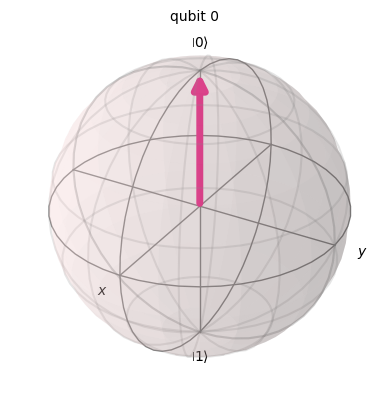

In [5]:
plot_bloch_multivector( psi1 )
# función que grafica el vector de Bloch , con el vector dentro del paréntesis

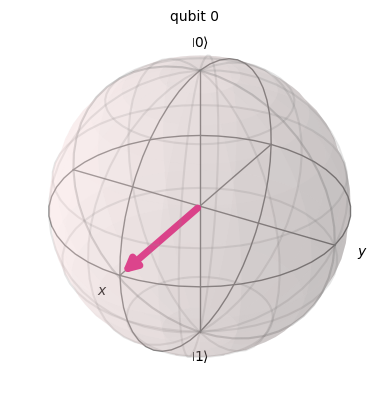

In [6]:
plot_bloch_multivector( psi2 )

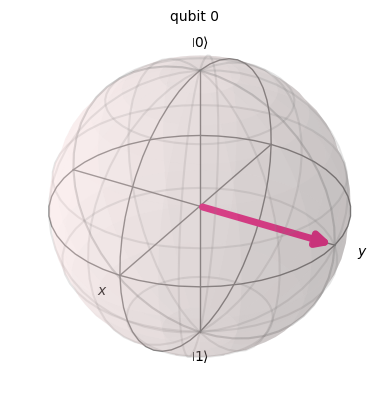

In [7]:
plot_bloch_multivector( psi3)

**Ejercicio 1**: Grafica las esfera de Bloch para los siguiente estados:

$$ |\psi_4\rangle = \frac{1}{\sqrt{5}}( |0\rangle + 2|1\rangle ) = \frac{1}{\sqrt{5}} \begin{bmatrix} 1 \\ 2 \end{bmatrix}$$

$$ |\psi_5\rangle = \frac{1}{\sqrt{2}}( |0\rangle - e^{i\pi/3} |1\rangle ) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -e^{i\pi/3}\end{bmatrix} $$


Hint: Considere la función np.exp de numpy

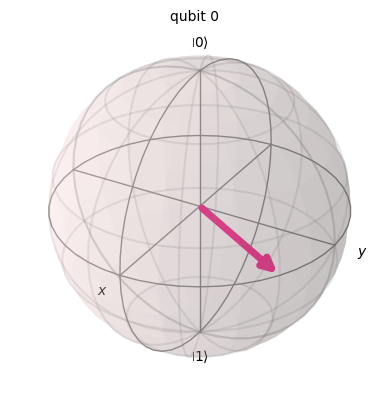

In [12]:
#Respuesta 1:
psi4 = [1/np.sqrt(5) , 2/np.sqrt(5)]
psi5 = [1/np.sqrt(2) , np.exp(1j*np.pi/3)/np.sqrt(2)]

plot_bloch_multivector(psi4)


La esfera de Bloch no esta definida para estados cuánticos de más de un
qubit. Para graficar ese tipos de estado podemos utilizar la Q-esfera.

Recordemos que los estados de dos qubits corresponden a la representación producto tensorial entre ambos

$$ |0\rangle \otimes |0\rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$$

In [13]:
from qiskit.visualization import plot_state_qsphere

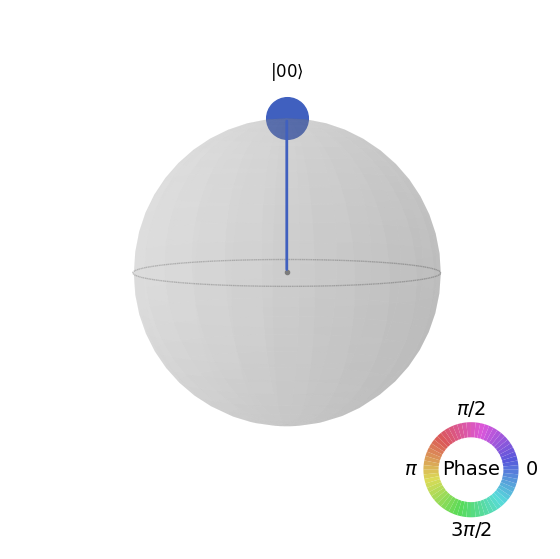

In [14]:
state_2qubits = [ 1,0,0,0]
plot_state_qsphere( state_2qubits )

Analogamente para3-qubits
$$ |0\rangle \otimes |0\rangle \otimes |0\rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}$$


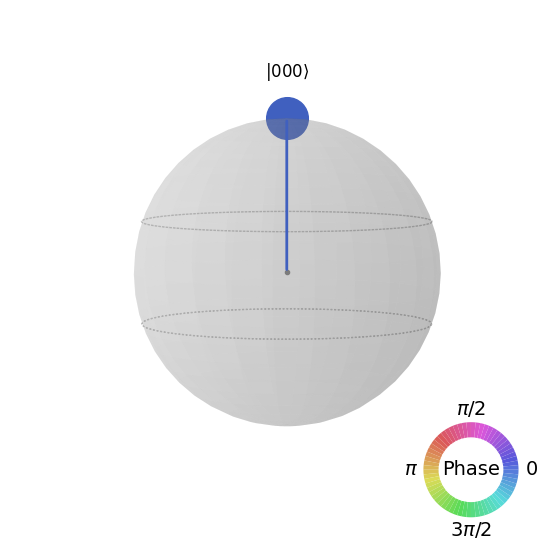

In [15]:
state_3qubits = [ 1, 0, 0, 0, 0, 0, 0, 0]
plot_state_qsphere( state_3qubits )

## Elementos básicos de Qiskit

`QuantumCircuit` es una clase que nos permite crear circuitos cuánticos. Esta necesita que le especifiquemos los bits cuánticos (qubits) y los bits clásicos (clbits), lo cual se puede hacer con las clases `QuantumRegister` y `ClassicalRegister`.

Importamos ambos elementos desde Qiskit

Elementos que se van a ocupar en toda la escuela!!

In [16]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [17]:
#Creación de registros
reg_cuant = QuantumRegister( 1 , name='qubit' )    #Registro cuántico llamado 'qubit'
reg_clas  = ClassicalRegister( 1 , name='clbit' )  #Registro clásico llamado 'clbit'
qc = QuantumCircuit( reg_cuant, reg_clas ) #Creamos un circuito cuantico con 1 qubit y 1 clbit

Podemos visualizar este circuito con la función draw. Este es un circuito inicializado en el estado  |0⟩.

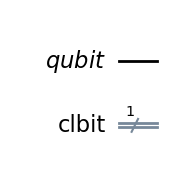

In [18]:
#Dibujemos el circuito cuántico mediante matplotlib función .draw
qc.draw( output='mpl' )

# Los nombres de cada registro aparecen a la izquierda, los registros cuánticos siempre aparecen arriba y los clásicos abajo.
# El circuito siempre inicia en el estado fundamental.

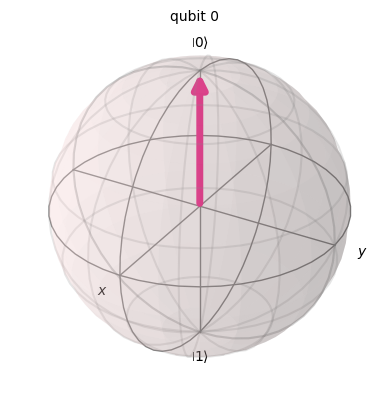

In [19]:
#Definamos un estado inicial y grafiquemoslo en la esfera de Bloch
state_init = [ 1, 0 ]
plot_bloch_multivector( state_init )

La clase `QuantumCircuit` tiene definidas funciones para aplicar las puertas cuánticas. La puerta $X$ definida como

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $$

lo cual nos permite negar el estado de un qubit, es decir

$$ X|0\rangle = |1\rangle $$
$$ X|1\rangle = |0\rangle $$

Para introducir una puerta $X$ en nuestro circuito basta con usar el siguiente comando:

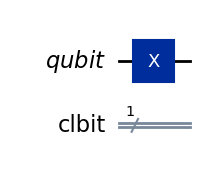

In [20]:
qc.x(0)
qc.draw( output='mpl' )
# La primera linea (o qubit) es la linea (qubit) 0.

Otra puerta cuántica muy importante es la Hadamard $H$,

$$ H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

la cual permite transformar el estado del qubit en una superposición, un fenómeno cuántico!, al aplicarla sobre los estados $|0\rangle$ y $|1\rangle$ obtenemos

$$ H|0\rangle = \frac{1}{\sqrt{2}}( |0\rangle + |1\rangle  ) $$
$$ H|1\rangle = \frac{1}{\sqrt{2}}( |0\rangle - |1\rangle  ) $$

Creemos nuevamente nuestro circuito, pero esta vez simplificando, y apliquemos una $H$:

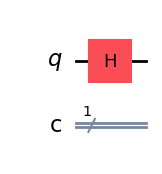

In [21]:
#Si no usas registros cuánticos, crea uno automaticamente con nombre genérico
qc = QuantumCircuit( 1, 1 )
qc.h(0)
qc.draw( output='mpl' )

Podemos cambiar la fase de un estado utilizando la puerta $Z$,

$$ Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

al aplicarla sobre los estados $|0\rangle$ y $|1\rangle$ obtenemos

$$ Z|0\rangle = |0\rangle $$
$$ Z|1\rangle = -|1\rangle $$

Si la aplicamos sobre un estado superposición, nos permite cambiar su fase local

$$ Z\left( \frac{1}{\sqrt{2}}( |0\rangle + |1\rangle  )  \right) = \frac{1}{\sqrt{2}}( |0\rangle - |1\rangle  ). $$

En la siguiente celda mostramos como implementar esto en un circuito cuántico.

Acá introducimos una barrera con la función `barrier()`, cuya función es simplemente separar visualmente distintas secciones de un circuito. El lado izquierdo de la barrera prepara el estado superposición mediante una $H$, y el lado derecho le cambia la fase local con una puerta $Z$.

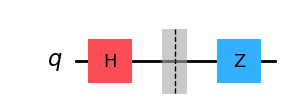

In [22]:
# Así creamos circuitos con solo registros cuánticos
qc = QuantumCircuit( 1 )   #solo registro cuántico, el registro cuántico está escondido
qc.h(0)
qc.barrier() #función barrera para ir ordenando visualmente el circuito
qc.z(0)
qc.draw( output='mpl' )

Podemos introducir entrelazamiento entre dos qubits empleando la compuerta controlled-not $CX$. Si el estado de 2 qubits es $|c,t\rangle,$ tenemos que el qubit target $|t\rangle$ es negado si el qubit control $|c\rangle$ vale 1, es decir:

$$CX|00\rangle = |00\rangle $$
$$CX|01\rangle = |01\rangle $$
$$CX|10\rangle = |11\rangle $$
$$CX|11\rangle = |10\rangle $$

Notemos que Qiskit etiqueta los qubits de derecha a izquierda, es decir $|c\rangle$ es el qubit 0 y $|t\rangle$ es el qubit 1.

La compuerta $CX$ en su representación matricial,

$$ CX = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} $$

Definamos un circuito de 2 qubits y apliquemos una $CX$.

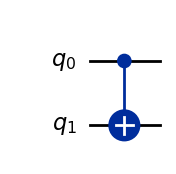

In [23]:
circ_cuant = QuantumCircuit( 2 )
circ_cuant.cx( control_qubit=0, target_qubit=1 )
circ_cuant.draw( output='mpl' )

Veamos un ejemplo más complejo. Consideremos el siguiente estado entrelazado:
$$ |\psi\rangle = \frac{1}{\sqrt{2}}( |00\rangle + |11\rangle ) $$
El circuito cuántico que prepara este estado emplea una $H$ y una $CX$.

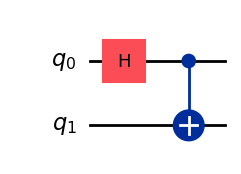

In [24]:
#Ejemplo
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)

qc.draw( output='mpl' )

Una herramienta util para estos casos es revisar el estado final de un circuito utilizando `Statevector()`.

In [25]:
from qiskit.quantum_info import Statevector

In [26]:
Statevector(qc)
# Representación vectorial del estado cuántico que se obtiene luego de pasar por el circuito

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


**Ejercicio 2**: Construir un circuito cuántico para preparar el estado
$$ |\psi\rangle = \frac{1}{\sqrt{2}}( |01\rangle - |10\rangle ). $$

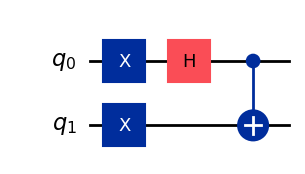

In [30]:
#Respuesta 2:
qc = QuantumCircuit(2)
qc.x(0)

qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.draw('mpl')



In [31]:
Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

¿Qué pasa al aplicar 2 X consecutivas, 2 CX consecutivas y 2 H consecutivas?

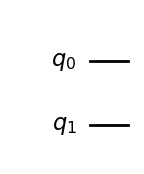

In [32]:
#Ejemplo
qc = QuantumCircuit(2)



qc.draw(output='mpl')

In [33]:
Statevector(qc)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


## Mediciones

Las mediciones nos permiten extraer información del estado cuántico. Los resultados son aleatorios y proyectan el estado despues de la medida. Podemos introducir una medición en un circuito mediante la función `measure( qubit, clbit )`, donde debemos especificar que qubits medimos y en que clbit guardamos los resultados.

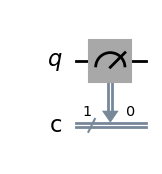

In [34]:
qc = QuantumCircuit( 1, 1 )
qc.measure( 0, 0 )  # qubit a medir , bits en donde se guarda la medicion
qc.draw( output='mpl' )

# La información queda almacenada en los bits clásicos

Ahora realizaremos la SIMULACIÓN de un experimento! Consideremos un circuito cuántico de 1 qubit con una puerta $H$ y una medición

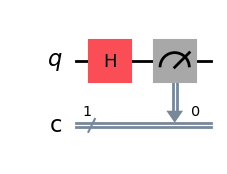

In [35]:
# en un computador clásico
qc = QuantumCircuit( 1, 1 )
qc.h( 0 )
qc.measure( 0, 0 )
qc.draw(output='mpl')

Qiskit incluye varios simuladores para ejecutar circuitos dentro del módulo `Aer`.
Para sacar la estadística del experimento.

In [36]:
from qiskit_aer import Aer  #simulador más general
Aer.backends() #así se obtiene el simulador

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

Como podemos ver existen muchos simuladores, y cada uno es útil en un contexto diferente. Nosotros utilizaremos el más general de todos, el `aer_simulator`.

In [37]:
simulador = Aer.get_backend( "aer_simulator" )

Ejecutamos nuestro circuito mediante el simulador gracias al comando `run`. Recuerda que las mediciones en mecánica cuantica son aleatorias, de modo que debemos repetir la medición varias veces para estimar las probabilidades de cada resultado. Esto lo especificamos con el input `shots`.

In [38]:
#Generalmente se utilizan shots = 2^13 = 8.192
job = simulador.run( qc, shots=100 )
# shots = corridas del simulador

Al ejecutar el circuito se nos creará un `Job`. Cuando el `Job` haya terminado, extraemos los resultados y posteriormente las cuentas.

In [40]:
counts = job.result().get_counts() #diccionario con los resultados
print( counts )

{'1': 55, '0': 45}


Podemos graficar estas cuentas mediante la función `plot_histogram` de `qiskit.visualization`.

In [42]:
from qiskit.visualization import plot_histogram #herramienta de qiskit

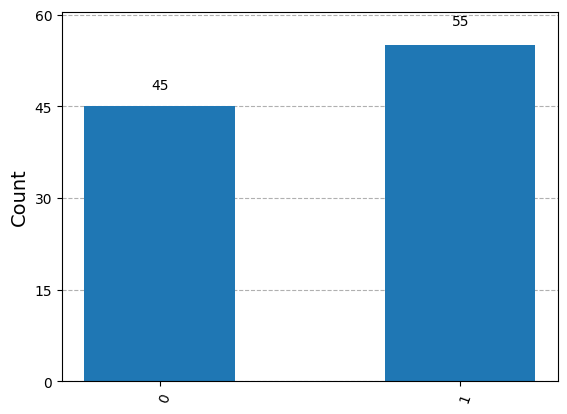

In [43]:
#Graficamos las cuentas creadas anteriormente en un histogram
plot_histogram( counts )

La Hadamard nos permite preparar un estado igualmente ponderado entre el $|0\rangle$ y el $|1\rangle$, lo cual concuerda con el resultado de la simulación, donde se ve que cada resultado se obtuvo con probabilidad cercana al $50\%$.

**Ejercicio 3**: Construir un circuito que prepare y mida el estado cuántico
$$ |\psi\rangle = \frac{1}{\sqrt{2}}( |0\rangle - i |1\rangle ). $$
Tambien realice un gráfico de la cuentas. Hint: buscar en Qiskit la definición de la puerta de fase (compuerta S).

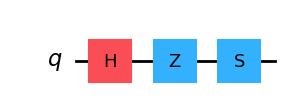

In [49]:
# Ejercicio 3
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.s(0)

qc.draw( output='mpl' )



In [50]:
Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

In [52]:
counts = job.result().get_counts() #diccionario con los resultados
print( counts )

{'1': 55, '0': 45}


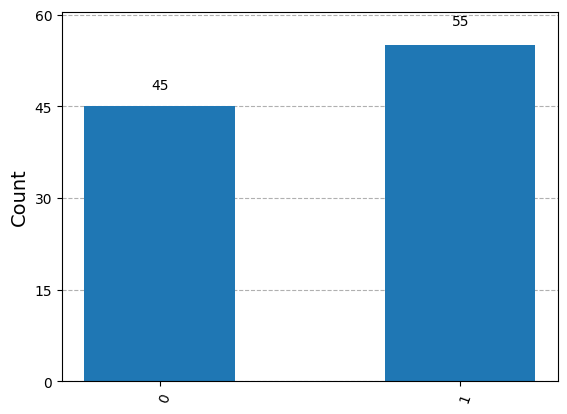

In [53]:
plot_histogram( counts )

**Ejercicio 4**: Construya un circuito que prepare y mida el estado cuántico
$$ |\psi\rangle = \frac{1}{2}( |00\rangle + |01\rangle + |10\rangle + |11\rangle  ). $$
Tambien realice un gráfico de la cuentas.

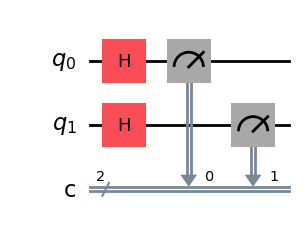

In [58]:
# Ejercicio 4
qc = QuantumCircuit(2,2)

qc.h([0,1])
qc.measure([0,1], [0,1])
qc.draw( output='mpl' )


Otro simulador muy útil es el `statevector_simulator`, el cual nos entrega el estado cuántico que define un circuito. Es importante destacar que este simulador solo acepta circuitos que NO incluyan MEDICIONES.


In [70]:
statevector_simulator = Aer.get_backend( "statevector_simulator" )

Tomemos por ejemplo el último circuito. Despues de ejecutarlo con este simulador podemos obtener su estado con el comando `get_statevector()`.

In [ ]:
# Copiar el circuito acá, sin mediciones, y ejecutarlo denuevo.


**Ejercicio 5**: Construya un circuito que prepare el siguiente estado cuántico
$$ |\psi\rangle = \frac{1}{\sqrt{2}}( |01\rangle + |10\rangle ). $$
Ejecutelo con el `statevector_simulator` y obtenga su estado. Grafique el estado sobre la Q-esfera.

In [ ]:
# Ejercicio 5


# Introducción a Qiskit 2

**Ejercicio 6**: Construya un circuito que prepare el siguiente estado entrelazado de tres qubits

$$ |\psi\rangle = \frac{1}{\sqrt{2}}( |000\rangle + |111\rangle ). $$

Este estado fue introducido en 1989 por Daniel Greenberger, Michael Horne and Anton Zeilinger, y por eso es conocido como estado GHZ. Hay que destacar que Zeilinger fue galardonado el año 2022 con el premio Nobel de Física por su trabajo en información cuántica!

Utilice el `statevector_simulator` para obtener el estado del ciruito y grafíquelo con la Q-esfera. Posteriormente, incluya mediciones en su circuito y utilice el `aer_simulator` para realizar la simulación del circuito. Grafique un histograma de las cuentas.

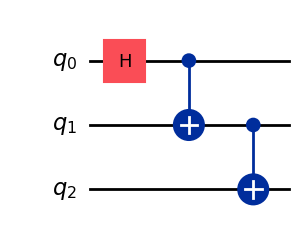

In [61]:
#Ejercicio 6:

qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)

qc.draw( output='mpl' )


In [71]:
job = statevector_simulator.run(qc, shots=100)

In [72]:
counts = job.result().get_counts()
print( counts )

{'000': 0.5, '111': 0.5}


In [73]:
state = job.result().get_statevector()
print(state)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


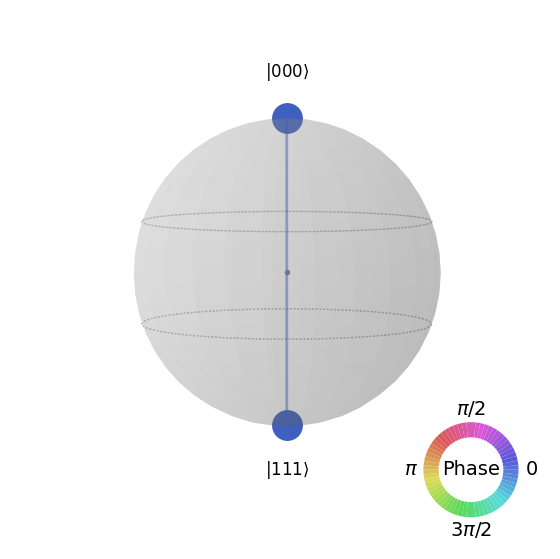

In [76]:
plot_state_qsphere( state )

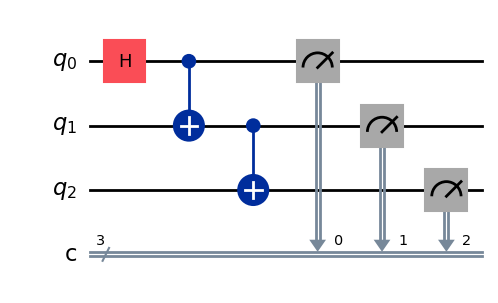

In [77]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)

qc.measure([0,1,2], [0,1,2])

qc.draw( output='mpl' )

In [79]:
job = simulador.run(qc, shots =100)
counts =job.result().get_counts()

{'000': 59, '111': 41}


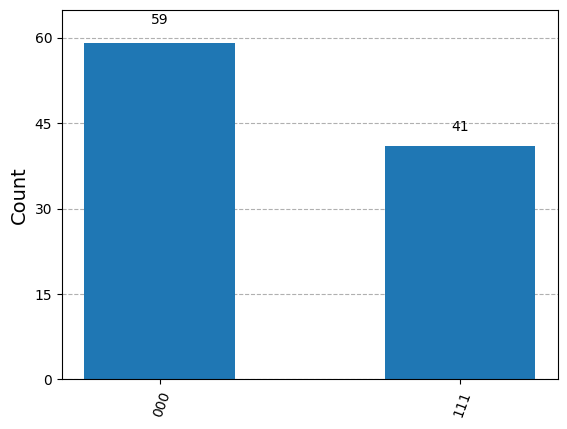

In [80]:
print(counts)
plot_histogram(counts)

## Qiskit primitives

Recientemente se han introducido los qiskit primitives para ejecutar y simular circuitos. Estas corresponden a los bloques de construcción más simples a partir del cual se pueden crear algoritmos más complejos. Estos son el ``sampler`` y el ``estimator``. Pronto estos pasarán a su versiones V2, pero por simplicidad utilizaremos las version V1.

In [81]:
from qiskit.primitives import Sampler, Estimator

sampler = Sampler()
estimator = Estimator()

<ipython-input-81-5a340f8c30dd>:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
<ipython-input-81-5a340f8c30dd>:4: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


El primitive ``Sampler``, similar al ``aer_simulator``, permite muestrear la distribución de probabilidad al medir un circuito.

In [82]:
qc = QuantumCircuit( 1, 1 )
qc.h(0)
qc.measure(0,0)

job = sampler.run( [qc] )
distribution = job.result().quasi_dists

print(f'La distribución de probabilidad del circuito simulado es', distribution[0])


La distribución de probabilidad del circuito simulado es {0: 0.5, 1: 0.5}


**Ejercicio 7**: Construir el estado GHZ de 4 qubits
$$
|GHZ_4\rangle = \frac{1}{\sqrt{2}}(|0000\rangle + |1111\rangle)
$$
 y simular la distribución de probabilidad utilizando el primitive Sampler. La distribución de probabilidad la entrega con la etiqueta decimal de los estados,
 $$
|0000\rangle = |0\rangle , \,  |1111\rangle = |15\rangle.
 $$

In [ ]:
# Ejercicio 7

#Construir circuito

# Realizar la simulación


Por otra parte, ``Estimator`` permite evaluar valores de expectación de observables, los cuales son operadores hermíticos. Sea $A$ un observable, su valor esperado sobre un estado cuántico $|\psi\rangle$ es
$$ \langle A \rangle = \langle \psi | A | \psi \rangle. $$
Los observables más conocidos son los operadores de Pauli,
$$\sigma_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \quad \sigma_y = \begin{pmatrix} 0 & -1j \\ 1j & 0 \end{pmatrix}  \quad \sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}. $$
Estimemos el valor esperado de $\sigma_y$ en el estado $H|0\rangle$. Esto lo hacemos incluyendo el string ``'Y'`` en el argumento de ``Estimator.run``. Notemos que cuando usamos ``Estimator`` no debemos incluir medidas en el circuito.

In [86]:
# Construir circuito
qc = QuantumCircuit( 1, 1 )
qc.h(0)

# Realizar la simulación
job = estimator.run( qc, 'Y' )
valor = job.result().values

print(f'El valor esperado simulado al medir Y es', valor[0])

El valor esperado simulado al medir Y es 0.0


Una opción para escribir operadores u observables es utilizar la función
`SparsePauliOp`. Por ejemplo, el observable $O = X + 3Y$ se escribe:

In [87]:
from qiskit.quantum_info import SparsePauliOp

Obs = SparsePauliOp(['X','Y'], [1,3])

print(Obs)

SparsePauliOp(['X', 'Y'],
              coeffs=[1.+0.j, 3.+0.j])


**Ejercicio 8**: Considerando el circuito GHZ de 4 qubits, encontrar el valor de expectación del observable
$$
O = IXIX + 3ZIZI.
$$

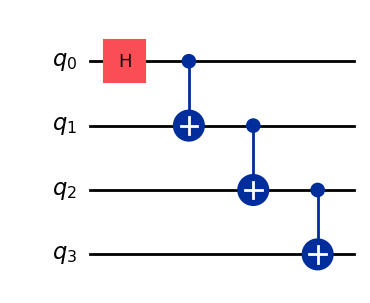

In [88]:
## Ejercicio 8

#Construir circuito
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.cx(2,3)

qc.draw( output='mpl' )



In [89]:
#Construir Observable

Obs = SparsePauliOp(['IXIX', 'ZIZI'], [1,3])
print(Obs)

job= estimator.run(qc, Obs, shots=100)
valor=job.result().values

print(f'El valor esperado simulado al medir Y es', valor[0] )


SparsePauliOp(['IXIX', 'ZIZI'],
              coeffs=[1.+0.j, 3.+0.j])
El valor esperado simulado al medir Y es 3.0384954647683244


## Computadores cuánticos reales

También podemos ejecutar nuestros circuitos utilizando computadores cuánticos reales. Primero debemos crear una cuenta de IBM Quantum y cargarla/guardarla.
LINK A IBM QUANTUM!

In [90]:
from qiskit_ibm_runtime import QiskitRuntimeService

#TOKEN tiene que estar entre comillas!!
TOKEN = '79aef00b76a04155975fe8b9040df4b5c46109ee3ee14bb9834e2765643810d9bf3342fdd191beb3a75ac904913535cc929c7c800a849ead89a9ced0d682c11b'

QiskitRuntimeService.save_account( token=TOKEN,
  channel="ibm_quantum" , overwrite=True) # `channel` distinguishes between different account types

# Load saved credentials
service = QiskitRuntimeService()

Desde nuestro `QiskitRuntimeService` podemos ver los dispositivos que tenemos disponibles de (`IBMBackend`), los computadores cuánticos reales.

In [91]:
# the backends you have access to
print(service.backends())

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]


Podemos ver las propiedades de estos dispositivos. La lista completa de atributos de la clase `IBMBackend` se encuentra en https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.IBMBackend .

Tambien podemos obtener información de las propiedades y arquitectura de los dispositivos dentro de la plataforma de IBM https://quantum.ibm.com/services/resources .

In [92]:
# Podemos ver las propiedades de estos dispositivo
backend = service.backend("ibm_brisbane")

print(
    f"Name: {backend.name}\n"
    f"Version: {backend.version}\n"
    f"No. of qubits: {backend.num_qubits}\n"
    f"Basis Gates: {backend.basis_gates}\n"
)

Name: ibm_brisbane
Version: 2
No. of qubits: 127
Basis Gates: ['ecr', 'id', 'rz', 'sx', 'x']



## Ejecutar un circuito en un computador cuántico real

Primero construyamo el  circuito a ejecutar.

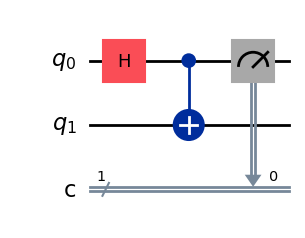

In [93]:
qc = QuantumCircuit(2,1)

qc.h(0)
qc.cx(0,1)

qc.measure(0,0)

qc.draw('mpl')

Seleccionamos un computador cuántico para ejecutar nuestros circuitos. Por ejemplo, nosotros utilizaremos el dispositivo con menos cola de espera.

In [94]:
comp_cuant = service.least_busy(operational=True, simulator=False)

print(
    f"Name: {comp_cuant.name}\n"
    f"Version: {comp_cuant.version}\n"
    f"No. of qubits: {comp_cuant.num_qubits}\n"
    f"Basis Gates: {comp_cuant.basis_gates}\n"
)

Name: ibm_kyiv
Version: 2
No. of qubits: 127
Basis Gates: ['ecr', 'id', 'rz', 'sx', 'x']



Antes de ejecutar nuestro circuito en un computador cuantico real, es necesario "transpilar" el circuito, es decir, reescribirlo de modo que solo utilice las instrucciones disponibles en el backend elegido. El proceso de transpilado tambien optimiza las instrucciones para minimizar los efectos del ruido.

Para más información sobre el proceso de transpilado visitar: https://docs.quantum.ibm.com/guides/transpile

In [95]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [96]:
# Las compuertas básicas del backend elegido son

comp_cuant.basis_gates

['ecr', 'id', 'rz', 'sx', 'x']

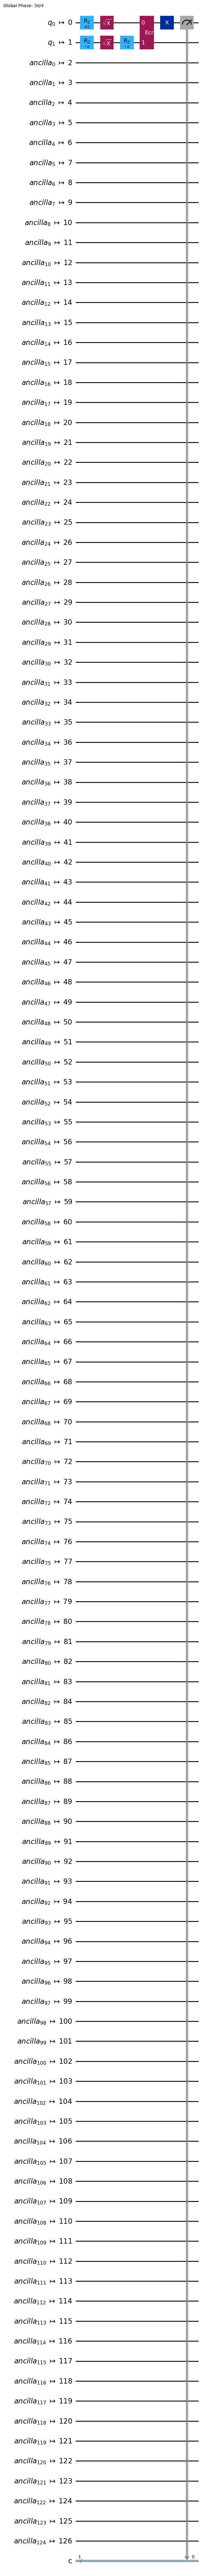

In [97]:
## Transpilamos el circuito a la compuertas básicas del dispositivo

pass_manager = generate_preset_pass_manager(
    optimization_level=1,
    backend=comp_cuant,
    layout_method="trivial",
)

transpiled_circ = pass_manager.run(qc)

transpiled_circ.draw('mpl')

El `layout_method` es como asignaremos los qubits del circuito a los qubits del dispositivo físico. Dependiendo de la arquitectura del computador cuántico la conexión entre qubits es distinta, por tanto es distinta la implementación de las compuertas. Y son óptimas para ciertas tareas.

'trivial' = Choose a Layout by assigning n circuit qubits to device qubits $0, .., n-1$.

'dense' = Choose a Layout by finding the most connected subset of qubits.

Podemos ver que el circuito despues de ser transpilado, implementa la Hadamard con dos rotaciones $RZ$ y una puerta $\sqrt{X}$, además de mostrar los 127 qubits del dispositivo como qubits ancilla. De este modo, podemos ejecutar el ciruito en el dispositivo real.

In [98]:
from qiskit_ibm_runtime import SamplerV2 as Sampler ## devuelve estados cuánticos
from qiskit_ibm_runtime import EstimatorV2 as Estimator ## devuelve valores de expectación

In [99]:
# Correremos el circuito y nos devolverá el estado cuántico final

sampler = Sampler(comp_cuant) # especificar dispositivo
job = sampler.run([transpiled_circ] , shots = 10_000) # enviar circuito al computador y esperar

# El job_id es el ID que identifica el job. Es muy importante guardar el ID de nuestros trabajos por si queremos recuperarlos más tarde.
print(f"job id: {job.job_id()}")

job id: cxy466rwk6yg008j4c7g


Ahora nuestro circuito ha quedado en cola para ser ejecutado. Desde el job podemos ver el ID de nuestro experimento, y su estado actual.

Desde la plataforma de IBM Quantum en la sección Workloads podemos ver los jobs que hemos envíado a los dispositivos reales de IBM y el tiempo de espera para los jobs enviados recientemente.

https://quantum.ibm.com/workloads

In [101]:
print(job.job_id())
print(job.status())

cxy466rwk6yg008j4c7g
DONE


Para extraer las cuentas experimentales hacemos exactamente lo mismo que antes para las simulaciones.

In [102]:
job_id = 'cxy466rwk6yg008j4c7g'     #identificación del trabajo

retrieved_job = service.job(job_id) #recuperar trabajo

result = retrieved_job.result()     #resultados del trabajo

result

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=10000, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2025-01-06 20:55:58', stop='2025-01-06 20:57:24', size=10000>)])}, 'version': 2})

{'1': 5090, '0': 4910}


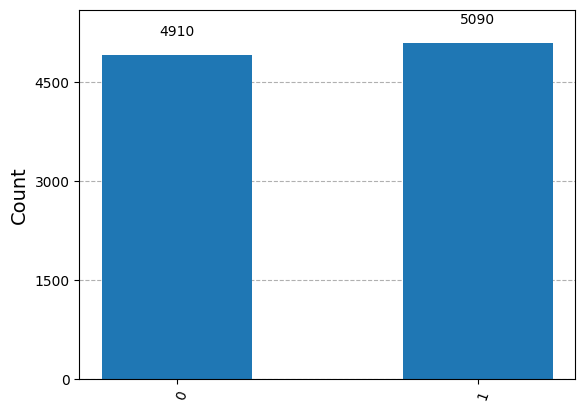

In [103]:
counts = result[0].data.c.get_counts()  # cuentas experimentales

print( counts ) #imprimimos cuentas
plot_histogram( counts) #graficamos en un histograma

In [104]:
import qiskit_ibm_runtime
qiskit_ibm_runtime.version.get_version_info()

'0.34.0'

In [105]:
import qiskit
qiskit.version.get_version_info()

'1.3.1'

## Contactos:

Constanza Vargas <br>
Estudiante magíster en ciencias físicas <br>
Universidad de Concepción <br>
Covargas2019@udec.cl

Barbara Candia <br>
Magíster en ciencias físicas <br>
Universidad de Concepción <br>
bacandia@udec.cl

Luciano Pereira <br>
Predoctoral researcher, IFF-CSIC, Spain <br>
luciano.ivan@iff.csic.es